Привет, меня зовут Артем. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Выводы и рассуждения получились содержательными, их было интересно читать.
* Отлично, что доверительный интервал и риск убытков посчитаны верно.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* С выбором региона согласен.
* Удачи в дальнейшем обучении и следующих работах!

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

## Загрузка и подготовка данных

In [ ]:
geo_data_0 = pd.read_csv('/data/geo_data_0.csv')
geo_data_1 = pd.read_csv('/data/geo_data_1.csv')
geo_data_2 = pd.read_csv('/data/geo_data_2.csv')

In [3]:
display(geo_data_0.head(10))
geo_data_0.info()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
display(geo_data_1.head(10))
geo_data_0.info()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
display(geo_data_2.head(10))
geo_data_0.info()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Предварительный просмотр данных показал, что в каждом из трёх датасетов (geo_data_0, geo_data_1, geo_data_2) по 100 000 строк. Датасеты содержат 5 колонок: уникальный идентификатор скважины (id), три числовых признака (f0, f1, f2) и целевой признак — объём запасов нефти в скважине (product). Пропусков данных нет, все числовые признаки представлены типом float64, а идентификатор скважины — object.

Далее предстоит:
- Разделить данные на обучающую и валидационную выборки.
- Обучить модель линейной регрессии для каждого региона.
- Оценить средний объём предсказанного сырья и метрику RMSE.
- Рассчитать потенциальную прибыль по регионам.
- Использовать Bootstrap для оценки рисков и прибыли.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены и осмотрены корректно.
</div>

## Обучение и проверка модели

In [6]:
# Функция для обучения модели и вывода результатов
def train_and_evaluate_model(data):
    # Разделение данных на признаки (X) и целевой признак (y)
    X = data.drop(['id', 'product'], axis=1)
    y = data['product']
    
    # Разделение на обучающую и валидационную выборки в соотношении 75:25
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Создание пайплайна: масштабирование + линейная регрессия
    model_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ])
    
    # Обучение модели
    model_pipeline.fit(X_train, y_train)
    
    # Предсказания на валидационной выборке
    predictions = model_pipeline.predict(X_val)
    
    # Средний запас предсказанного сырья и RMSE модели
    mean_predicted = predictions.mean()
    rmse = np.sqrt(mean_squared_error(y_val, predictions))
    
    print(f"Средний запас предсказанного сырья: {mean_predicted:.2f} тыс. баррелей")
    print(f"RMSE модели: {rmse:.2f}")
    
    # Возвращаем предсказания и правильные ответы для дальнейшего анализа
    return y_val, predictions

In [7]:
def plot_predictions_distribution(predictions, region):
    print(f"Среднее значение: {np.mean(predictions):.2f}")
    print(f"Медиана: {np.median(predictions):.2f}")
    print(f"Стандартное отклонение: {np.std(predictions):.2f}")
    print(f"Минимум: {np.min(predictions):.2f}")
    print(f"Максимум: {np.max(predictions):.2f}")
    print(f"25-й процентиль: {np.percentile(predictions, 25):.2f}")
    print(f"75-й процентиль: {np.percentile(predictions, 75):.2f}")
        
    # Гистограмма распределения предсказаний
    plt.figure(figsize=(10, 6))
    sns.histplot(predictions, kde=True, bins=30, color='blue')
    
    plt.title(f'Распределение предсказанных значений нефти для региона {region}')
    plt.xlabel('Предсказанный объем нефти (тыс. баррелей)')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

Регион 0:
Средний запас предсказанного сырья: 92.40 тыс. баррелей
RMSE модели: 37.76
Распределение предсказаний для региона 0:
Среднее значение: 92.40
Медиана: 92.41
Стандартное отклонение: 23.22
Минимум: -9.84
Максимум: 176.54
25-й процентиль: 76.79
75-й процентиль: 108.04


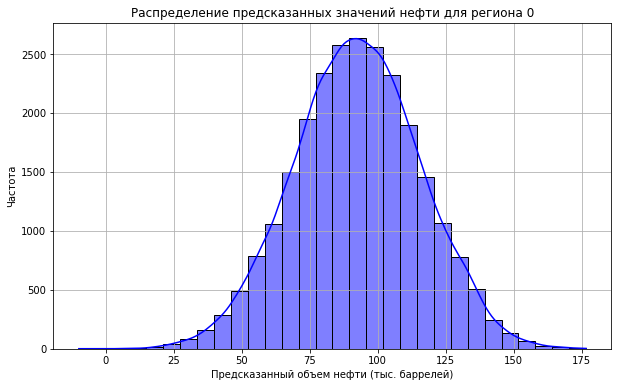

In [8]:
print("Регион 0:")
target_0, pred_0 = train_and_evaluate_model(geo_data_0)
print("Распределение предсказаний для региона 0:")
plot_predictions_distribution(pred_0, 0)

Средний предсказанный запас сырья в этом регионе довольно высок (92.40 тыс. баррелей), но ошибка модели (RMSE = 37.76) относительно велика. Это указывает на значительную вариативность между фактическими и предсказанными значениями, что может свидетельствовать о том, что модель недостаточно точно предсказывает объёмы запасов.

Среднее и медиана почти равны, что говорит о симметричном распределении предсказаний.
Стандартное отклонение (23.22) и минимальное значение (-9.84) указывают на наличие негативных предсказаний, но их немного.


Регион 1:
Средний запас предсказанного сырья: 68.71 тыс. баррелей
RMSE модели: 0.89
Распределение предсказаний для региона 1:
Среднее значение: 68.71
Медиана: 57.92
Стандартное отклонение: 45.95
Минимум: -2.07
Максимум: 139.98
25-й процентиль: 28.58
75-й процентиль: 109.31


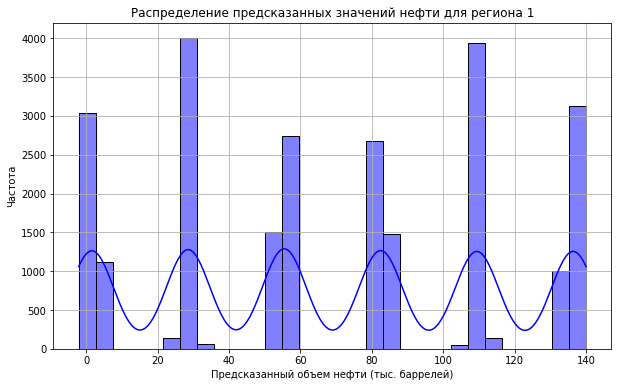

In [9]:
print("\nРегион 1:")
target_1, pred_1 = train_and_evaluate_model(geo_data_1)
print("Распределение предсказаний для региона 1:")
plot_predictions_distribution(pred_1, 1)

В этом регионе модель демонстрирует практически идеальные результаты. Средний запас сырья меньше, чем в первом регионе (68.71 тыс. баррелей), но RMSE чрезвычайно низкий (0.89), что означает, что предсказания модели очень близки к фактическим значениям. Это свидетельствует о хорошей модели для этого региона.

Однако стандартное отклонение (45.95) и значительный разброс в данных (от -2.07 до 139.98 тыс. баррелей) показывают, что предсказания сильно варьируются.


Регион 2:
Средний запас предсказанного сырья: 94.77 тыс. баррелей
RMSE модели: 40.15
Распределение предсказаний для региона 2:
Среднее значение: 94.77
Медиана: 94.61
Стандартное отклонение: 19.93
Минимум: 16.20
Максимум: 170.53
25-й процентиль: 81.16
75-й процентиль: 108.36


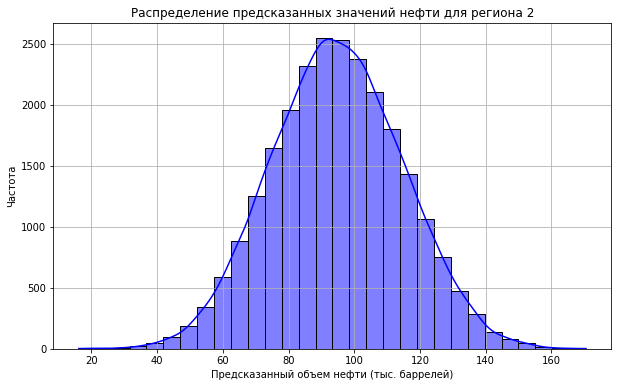

In [10]:
print("\nРегион 2:")
target_2, pred_2 = train_and_evaluate_model(geo_data_2)
print("Распределение предсказаний для региона 2:")
plot_predictions_distribution(pred_2, 2)

Регион 2 имеет самый высокий средний предсказанный запас сырья (94.77 тыс. баррелей), однако RMSE также высок (40.15), что указывает на большую ошибку модели и, следовательно, низкую точность предсказаний, как и в первом регионе.

Стандартное отклонение (19.93) относительно невелико, а минимум (16.20 тыс. баррелей) показывает, что в этом регионе все предсказания положительны.

<div class="alert alert-block alert-success">
<b>Успех:</b> Модели обучены корректно. Радует, что ты активно используешь функции. Это помогает избежать дублирования кода, а значит уменьшает вероятность совершить ошибку/опечатку!
</div>

## Подготовка к расчёту прибыли

In [11]:
# Исходные данные
BUDGET = 10000000000
REVENUE_PER_THOUSAND_BARREL = 450000
NUM_WELLS = 200

In [12]:
# Расчёт достаточного объёма сырья на одну скважину
# Сумма, которую должна принести одна скважина
total_revenue_needed = BUDGET / NUM_WELLS
# Минимальный объём сырья в тысячах баррелей
min_volume_per_well = total_revenue_needed / REVENUE_PER_THOUSAND_BARREL

print(f'Достаточный объём нефти для безубыточности: {min_volume_per_well:.2f} тыс. баррелей')

Достаточный объём нефти для безубыточности: 111.11 тыс. баррелей


Если средний запас нефти в регионе выше, чем рассчитанный минимальный объём - 111.11 тыс.баррелей, можно рассчитывать на безубыточность или прибыль.

<div class="alert alert-block alert-info">

<b>Совет: </b> В названиях константных переменных лучше использовать только БОЛЬШИЕ буквы. Это соглашение между программистами: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#id29 .
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Точка безубыточности найдена верно, сравнение проведено!
</div>

## Расчёт прибыли и рисков 

In [13]:
def calculate_profit(target, predictions, count_wells=NUM_WELLS):
    
    # Выбираем индексы лучших скважин по предсказаниям
    selected_indices = predictions.argsort()[-count_wells:][::-1]
    
    # Суммируем целевые значения объёма сырья для выбранных скважин
    selected_wells = target.iloc[selected_indices]
    total_volume = selected_wells.sum()

    # Рассчитываем прибыль
    profit = total_volume * REVENUE_PER_THOUSAND_BARREL - BUDGET

    return profit

In [14]:
profit_region_0 = calculate_profit(target_0, pred_0)
print(f'Прибыль региона 0: {profit_region_0/1000000000:.3f} млрд. рублей')

Прибыль региона 0: 3.359 млрд. рублей


In [15]:
profit_region_1 = calculate_profit(target_1, pred_1)
print(f'Прибыль региона 1: {profit_region_1/1000000000:.3f} млрд. рублей')

Прибыль региона 1: 2.415 млрд. рублей


In [16]:
profit_region_2 = calculate_profit(target_2, pred_2)
print(f'Прибыль региона 2: {profit_region_2/1000000000:.3f} млрд. рублей')

Прибыль региона 2: 2.599 млрд. рублей


По результатам расчётов прибыли для трёх регионов можно сделать следующие выводы:
- Регион 0 является наиболее выгодным для разработки, поскольку демонстрирует максимальную прибыль при выбранных 200 лучших скважинах, несмотря на более высокую ошибку модели.
- Регион 1 показал наилучшую точность предсказаний, но меньшие объёмы сырья привели к более низкой прибыли.
- Регион 2 обладает значительной неопределённостью из-за самой высокой ошибки предсказаний, что делает его менее привлекательным для разработки, несмотря на чуть большую прибыль по сравнению с регионом 1.

Посчитайте риски и прибыль для каждого региона:
1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

In [17]:
def bootstrap_profit(target, predictions, n_samples=1000, sample_size=500):
    profits = []
    state = np.random.RandomState(12345)
    
    # Преобразуем predictions в pandas.Series, если это не так
    if isinstance(predictions, np.ndarray):
        predictions = pd.Series(predictions, index=target.index)
    
    for i in range(n_samples):
        # Случайная выборка с повторениями из индексов
        subsample_target = target.sample(n=sample_size, replace=True, random_state=state) # подвыборка с 500 значениями
        subsample_predictions = predictions.loc[subsample_target.index]
        
        # Рассчитаем прибыль для этой выборки
        profit = calculate_profit(subsample_target, subsample_predictions)
        profits.append(profit)
    
    profits = pd.Series(profits)
    
    # Найдем среднюю прибыль, доверительный интервал и риск
    mean_profit = profits.mean()
    lower = profits.quantile(0.025)
    upper = profits.quantile(0.975)
    risk = (profits < 0).mean()
    
    return mean_profit, lower, upper, risk

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Этот шаг нужно будет переработать.
    
1. В предыдущих шагах было получено 25000 настоящих и предсказанных значений для каждого региона.
2. Здесь нужно определить функцию, которая на вход будет принимать 500 настоящих и 500 предсказанных значений для каждого региона. Для выбора 200 лучших скважин нужно использовать предсказанные значения. А вот для подсчета прибыли должны использоваться настоящие значения соответствующих ячеек.
3. В следующем шаге нужно семплить 500 случайных скважин и передавать их в функцию для подсчета прибыли.
4. В результате у тебя получится 1000 значений прибыли для каждого региона. По нему нужно посчитать 3 статистики:
    * Среднюю прибыль
    * Интервал с помощью метода квантилей
    * Риск убытков – долю случаев, в которых прибыль отрицательна.
</div>


<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения:
    
1. Для функции bootstrap добавил аргумент sample_size, по умолчанию равным 500.
2. Теперь функция в каждом цикле for берет подвыборку равную sample_size = 500.
3. Логика подсчета прибыли по подвыборкам с помошью функции calculate_profit не поменялась, так как функция и так определяла 200 лучших по предсказанным данным, а считала прибыль по настоящим.
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что для подсчета доверительного интервала использовался именно метод квантилей!
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Риск найден очень элегантно.
</div>

In [18]:
# Применим функцию для каждого региона
mean_profit_0, lower_0, upper_0, risk_0 = bootstrap_profit(target_0, pred_0)
mean_profit_1, lower_1, upper_1, risk_1 = bootstrap_profit(target_1, pred_1)
mean_profit_2, lower_2, upper_2, risk_2 = bootstrap_profit(target_2, pred_2)

In [19]:
# Вывод результатов
print(f"Регион 0: Средняя прибыль = {mean_profit_0/1e6:.2f} млн руб.")
print(f"95%-й доверительный интервал: от {lower_0/1e6:.2f} до {upper_0/1e6:.2f} млн руб.")
print(f"Риск убытков: {risk_0 * 100:.1f}%")

print(f"Регион 1: Средняя прибыль = {mean_profit_1/1e6:.2f} млн руб.")
print(f"95%-й доверительный интервал: от {lower_1/1e6:.2f} до {upper_1/1e6:.2f} млн руб.")
print(f"Риск убытков: {risk_1 * 100:.1f}%")

print(f"Регион 2: Средняя прибыль = {mean_profit_2/1e6:.2f} млн руб.")
print(f"95%-й доверительный интервал: от {lower_2/1e6:.2f} до {upper_2/1e6:.2f} млн руб.")
print(f"Риск убытков: {risk_2 * 100:.1f}%")

Регион 0: Средняя прибыль = 406.28 млн руб.
95%-й доверительный интервал: от -117.74 до 911.74 млн руб.
Риск убытков: 6.7%
Регион 1: Средняя прибыль = 432.62 млн руб.
95%-й доверительный интервал: от 16.85 до 815.97 млн руб.
Риск убытков: 1.9%
Регион 2: Средняя прибыль = 377.36 млн руб.
95%-й доверительный интервал: от -170.78 до 901.77 млн руб.
Риск убытков: 7.4%


По результатам анализа:

**1. Средняя прибыль:**
- Наибольшая средняя прибыль ожидается в регионе 1 — 432.62 млн руб., что больше, чем в других регионах.
- Регион 0 с прибылью в 406.28 млн руб. чуть уступает региону 1.
- Регион 2 имеет наименьшую ожидаемую прибыль — 377.36 млн руб.

**2. Доверительный интервал:**
- Регион 1 также имеет наилучший 95%-й доверительный интервал — от 16.85 млн руб., что выше нуля. Это говорит о том, что вероятность получения прибыли выше.
- Регионы 0 и 2 имеют отрицательные значения в нижней границе доверительного интервала, что указывает на возможность получения убытков.

**3. Риск убытков:**
- Наименьший риск убытков у региона 1 — 1.9%. Это делает его наиболее безопасным вариантом.
- Регион 0 имеет риск убытков 6.7%, что заметно выше.
- Регион 2 имеет самый высокий риск убытков — 7.4%, что делает его наименее привлекательным.

## Общий вывод

В ходе выполнения задачи по оценке регионов для разработки нефтяных скважин были последовательно выполнены следующие этапы:

1. **Загрузка и предварительная обработка данных**:
   - Все три датасета содержат по 100 000 строк и пять колонок: уникальный идентификатор скважины, три числовых признака, и целевой признак — объём запасов нефти.
   - Пропусков в данных нет, и все признаки были в корректных форматах для дальнейшего анализа.
   
2. **Разделение данных и обучение моделей**:
   - Данные каждого региона были разделены на обучающую и валидационную выборки в пропорции 75% на 25%.
   - Для каждого региона была обучена модель линейной регрессии с применением масштабирования признаков.
   - Для каждого региона были получены следующие результаты по среднему объёму предсказанного сырья и метрике RMSE:
     - **Регион 0**: Средний запас предсказанного сырья составил 92.40 тыс. баррелей, а RMSE модели — 37.76.
     - **Регион 1**: Средний запас предсказанного сырья составил 68.71 тыс. баррелей, а RMSE модели — всего 0.89.
     - **Регион 2**: Средний запас предсказанного сырья составил 94.77 тыс. баррелей, а RMSE модели — 40.15.
   
3. **Анализ распределения предсказанных запасов нефти**:
   - Для каждого региона была проведена диагностика распределения предсказаний. Были получены такие показатели, как среднее значение, медиана, стандартное отклонение, минимальные и максимальные значения, а также квартильные значения.
   - Распределения показали, что во всех регионах значения распределяются относительно симметрично, однако в каждом регионе наблюдаются свои особенности по диапазону предсказаний и их разбросу.

4. **Расчёт минимального объёма нефти для безубыточности**:
   - На основе бюджета в 10 млрд рублей и дохода в 450 тыс. рублей за 1000 баррелей нефти было рассчитано, что для безубыточной работы каждой скважины необходимо добывать не менее 111.11 тыс. баррелей нефти.

5. **Оценка потенциальной прибыли**:
   - Для каждого региона была рассчитана потенциальная прибыль, исходя из 200 лучших скважин по предсказанным данным. Результаты прибыли составили:
     - Регион 0: 3.36 млрд руб.
     - Регион 1: 2.42 млрд руб.
     - Регион 2: 2.60 млрд руб.

6. **Оценка рисков и прибыли методом Bootstrap**:
   - Для каждого региона был проведён бутстреп-анализ, который оценил среднюю прибыль, доверительные интервалы (95%) и вероятность убытков.
     - Регион 0: Средняя прибыль — 406.3 млн руб., доверительный интервал — от -117.7 до 911.7 млн руб., риск убытков — 6.7%.
     - Регион 1: Средняя прибыль — 432.6 млн руб., доверительный интервал — 16.9 до 816.0 млн руб., риск убытков — 1.9%.
     - Регион 2: Средняя прибыль — 377.4 млн руб., доверительный интервал — от -170.8 до 901.8 млрд руб., риск убытков — 7.4%.

На основе условий задачи были рассмотрены регионы с риском убытков менее 2.5%. Только в Регионе 1 риск убытков оказался меньше указанного порога, что позволяет рассматривать его для дальнейшего анализа.

Среди всех регионов:
- **Регион 1** показал наибольшую среднюю прибыль — 432.6 млн рублей, с доверительным интервалом от 16.9 до 816.0 млн рублей.
- Это делает **Регион 1** наилучшим вариантом для разработки нефтяных скважин с точки зрения максимальной прибыли при низком уровне рисков.

    Таким образом, на основании всех проведённых расчётов и анализа, **рекомендуется инвестировать в Регион 1**, поскольку он демонстрирует наивысшую прибыль и приемлемый риск убытков.

<div class="alert alert-block alert-warning">
<b>Изменения:</b>
    Были обновлены выводы в соответсвии с результатами обновленной функции bootstrap_profit
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [X]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован